<h1 style="color:blue">Part A: Airbnb Price Prediction and Insights</h1>

<h4>1. Overview</h4>

<p>Airbnb provides a platform for property owners to rent out their spaces to travelers. Pricing a
listing effectively is critical for maximizing revenue while staying competitive in the market.
For hosts, understanding what factors influence the price of their listings is essential.</<br>
<p>This project aims to build a machine learning model to predict the price of Airbnb listings
based on various features such as property type, room type, location, amenities, and host
characteristics. By analyzing these factors, this project will provide actionable insights to
Airbnb hosts to optimize their listing pri </p>/p>p>

<h4>2. Problem Statemen</h4>

<p>The primary objective of this project is to develop a regression model that predicts the price
of an Airbnb listing. Using features such as property type, room type, number of reviews,
location, and amenities, the model will aim to estimate the price accurately.
The insights derived from this analysis will help Airbnb hosts understand the key drivers of
price, enabling them to make data-driven decisions for pricing their properties. Additionally,
the project will help Airbnb refine its recommendations for pricing to improve host and guest
satisfaction.</p>

<h4>3. Data Information</h4>

<a href="https://docs.google.com/document/d/1BhJoNJ9RgTgAHbAiOXh6tgTSjtuFkPox/edit?usp=sharing&ouid=103283051675327639429&rtpof=true&sd=true">DataSet</a>

<h2> Deliverables </h2>

<h4>1.Data Exploration and Preprocessing (10 Marks):</h4>
<p>Analyze the dataset for trends, missing values, and outliers.</p><p> Perform data cleaning, feature engineering, and transformations.</p>

In [1]:
import numpy as np
import pandas as pd

In [208]:
df = pd.read_csv("Airbnb_data - airbnb_data.csv")

<h2>Data Dectionary</h2>
<a href="https://docs.google.com/document/d/1BhJoNJ9RgTgAHbAiOXh6tgTSjtuFkPox/edit">Details Of DataSet</a>


In [209]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


<h1> Data Exploration and Preprocessing</h1>

In [210]:
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


<h4>Count Of Null Value</h4>

In [211]:
df.isnull().sum()

id                            0
log_price                     0
property_type                 0
room_type                     0
amenities                     0
accommodates                  0
bathrooms                   200
bed_type                      0
cancellation_policy           0
cleaning_fee                  0
city                          0
description                   0
first_review              15864
host_has_profile_pic        188
host_identity_verified      188
host_response_rate        18299
host_since                  188
instant_bookable              0
last_review               15827
latitude                      0
longitude                     0
name                          0
neighbourhood              6872
number_of_reviews             0
review_scores_rating      16722
thumbnail_url              8216
zipcode                     968
bedrooms                     91
beds                        131
dtype: int64

<p style="color:blue">We Can see hare there are null value which are oftenly two type</p>
<p style="color:blue">one is object type and we can remove this using mode which replace as most frequent in column</p>
<p style="color:blue">second one is kind of int or float which can we remove using mean function</p>

<h4>Calculation Of Outliers</h4>

In [212]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

outliers = {}
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]

# Print outliers
for col, outlier_values in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_values, "\n")


Outliers in id:
Series([], Name: id, dtype: int64) 

Outliers in log_price:
3        6.620073
24       6.956545
52       6.620073
62       6.907755
148      7.150701
           ...   
73939    6.731018
73953    6.829794
73957    6.684612
74031    6.907755
74081    6.907755
Name: log_price, Length: 1532, dtype: float64 

Outliers in accommodates:
19        8
42        8
62        9
104       9
109       9
         ..
74031     8
74032    10
74042     8
74081    16
74102    10
Name: accommodates, Length: 3604, dtype: int64 

Outliers in bathrooms:
11       1.5
13       1.5
15       1.5
17       2.0
21       1.5
        ... 
74078    2.0
74088    2.5
74092    2.0
74102    3.0
74107    2.0
Name: bathrooms, Length: 15812, dtype: float64 

Outliers in latitude:
Series([], Name: latitude, dtype: float64) 

Outliers in longitude:
Series([], Name: longitude, dtype: float64) 

Outliers in number_of_reviews:
8        159
10        82
21        57
22        73
32       248
        ... 
74037    15

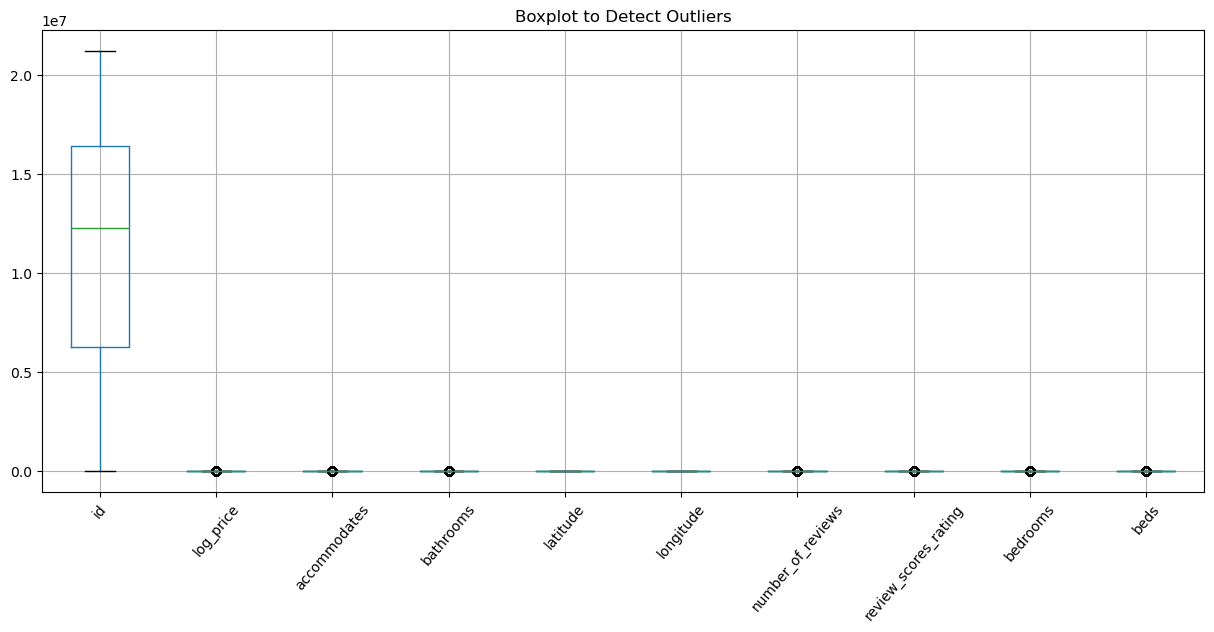

In [213]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))
df[numerical_cols].boxplot(rot=50)
plt.title("Boxplot to Detect Outliers")
plt.show()

In [214]:
df.shape

(74111, 29)

In [215]:
import seaborn as sns

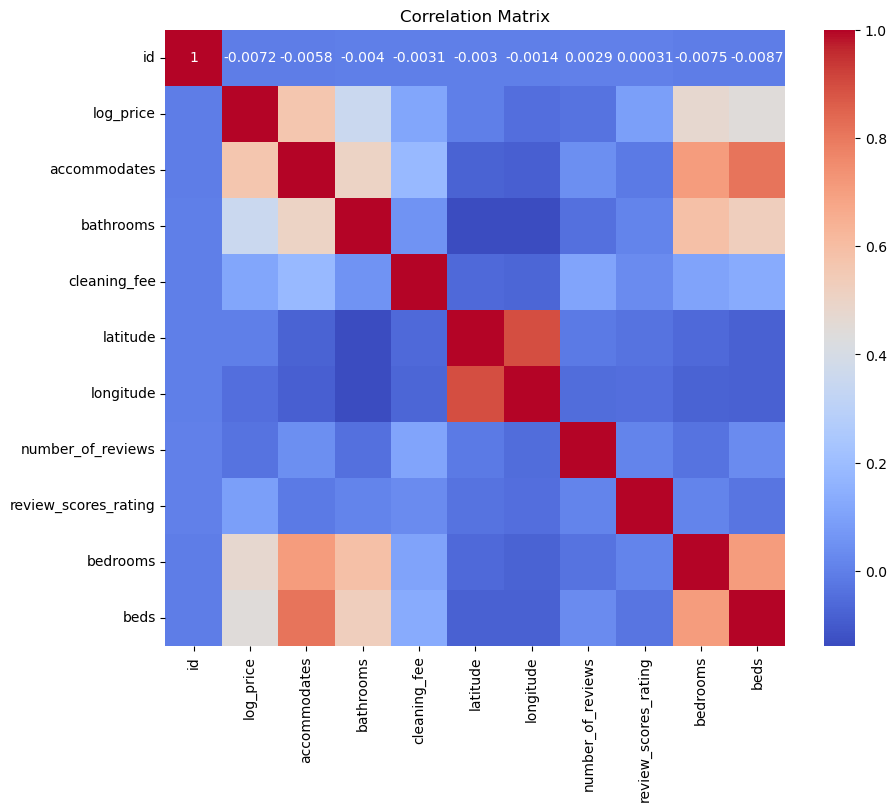

In [216]:
num_cols = list()

for column in df.columns:
    if df[column].dtype != object:
       num_cols.append(column)
        
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<p style="color:blue">Correlation matrix show the relation between data columns </p>

In [217]:
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_summary = missing_summary[missing_summary['Missing Values'] > 0]  

missing_summary

,Missing Values,Percentage
host_response_rate,18299,24.691341
review_scores_rating,16722,22.563452
first_review,15864,21.405729
last_review,15827,21.355804
thumbnail_url,8216,11.086074
neighbourhood,6872,9.272578
zipcode,968,1.306149
bathrooms,200,0.269865
host_identity_verified,188,0.253674
host_since,188,0.253674


In [218]:
df.drop(columns=['thumbnail_url', 'name', 'description', 'first_review', 'last_review'], inplace=True)

In [219]:
df['host_response_rate'] = df['host_response_rate'].str.rstrip('%').astype(float) 

In [220]:
df['host_response_rate'].fillna(df['host_response_rate'].median(), inplace=True)

In [221]:
df['review_scores_rating'].fillna(df['review_scores_rating'].median(), inplace=True)

In [222]:
df['bathrooms'].fillna(df['bathrooms'].median(), inplace=True)

In [223]:
df['bedrooms'].fillna(df['bedrooms'].median(), inplace=True)

In [224]:
df['beds'].fillna(df['beds'].median(), inplace=True)

In [225]:
df['zipcode'].fillna(df['zipcode'].mode()[0], inplace=True) 

In [226]:
df.isnull().sum()

id                           0
log_price                    0
property_type                0
room_type                    0
amenities                    0
accommodates                 0
bathrooms                    0
bed_type                     0
cancellation_policy          0
cleaning_fee                 0
city                         0
host_has_profile_pic       188
host_identity_verified     188
host_response_rate           0
host_since                 188
instant_bookable             0
latitude                     0
longitude                    0
neighbourhood             6872
number_of_reviews            0
review_scores_rating         0
zipcode                      0
bedrooms                     0
beds                         0
dtype: int64

In [227]:
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy']

In [228]:
# Applying one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [229]:
# Checking the cleaned dataset
df_encoded.info(), df_encoded.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 64 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   74111 non-null  int64  
 1   log_price                            74111 non-null  float64
 2   amenities                            74111 non-null  object 
 3   accommodates                         74111 non-null  int64  
 4   bathrooms                            74111 non-null  float64
 5   cleaning_fee                         74111 non-null  bool   
 6   city                                 74111 non-null  object 
 7   host_has_profile_pic                 73923 non-null  object 
 8   host_identity_verified               73923 non-null  object 
 9   host_response_rate                   74111 non-null  float64
 10  host_since                           73923 non-null  object 
 11  instant_bookable            

(None,
          id  log_price                                          amenities  \
 0   6901257   5.010635  {"Wireless Internet","Air conditioning",Kitche...   
 1   6304928   5.129899  {"Wireless Internet","Air conditioning",Kitche...   
 2   7919400   4.976734  {TV,"Cable TV","Wireless Internet","Air condit...   
 3  13418779   6.620073  {TV,"Cable TV",Internet,"Wireless Internet",Ki...   
 4   3808709   4.744932  {TV,Internet,"Wireless Internet","Air conditio...   
 
    accommodates  bathrooms  cleaning_fee city host_has_profile_pic  \
 0             3        1.0          True  NYC                    t   
 1             7        1.0          True  NYC                    t   
 2             5        1.0          True  NYC                    t   
 3             4        1.0          True   SF                    t   
 4             2        1.0          True   DC                    t   
 
   host_identity_verified  host_response_rate  ... room_type_Private room  \
 0                

<h1>Model Development</h1>

In [230]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [231]:
X = df_encoded.drop(columns=['id', 'log_price', 'amenities', 'city', 'host_has_profile_pic', 
                             'host_identity_verified', 'host_since', 'instant_bookable', 'neighbourhood', 'zipcode'])
y = df_encoded['log_price']

In [232]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [233]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [234]:
y_pred = model.predict(X_test)

<h1>Model Evaluation</h1>

In [235]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.4888764174109062

In [236]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.36908012568334025

In [237]:
r2 = r2_score(y_test, y_pred)
r2

0.5347710672827519

<h3>Lasso Regulization increase the accuracy</h3>

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

In [246]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Lasso Regression model
lasso = Lasso(alpha=1.0)  
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred = lasso.predict(X_test_scaled)

# Model evaluation
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.5137845181767656


In [247]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
rmse

0.7167876381305454

In [248]:
mae = mean_absolute_error(y_test, y_pred)
mae

0.5603603025057452

<h2>Video Discription</h2>

<h4>For discription</h4>
<a href="">Cilick On Me </a>